# Final Project Bailey Korfhage

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset=pd.read_csv('term_deposit.csv')

In [3]:
dataset.head()

,age,marital,education,balance,housing,loan,duration,y
0,44.0,single,secondary,29.0,yes,no,151,no
1,33.0,married,secondary,2.0,yes,yes,76,no
2,47.0,married,unknown,1506.0,yes,no,92,no
3,33.0,single,unknown,1.0,no,no,198,no
4,35.0,married,tertiary,231.0,yes,no,139,no


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 0 to 45209
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45201 non-null  float64
 1   marital    45210 non-null  object 
 2   education  45210 non-null  object 
 3   balance    45207 non-null  float64
 4   housing    45210 non-null  object 
 5   loan       45210 non-null  object 
 6   duration   45210 non-null  int64  
 7   y          45210 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.8+ MB


## Missing data using Numpy

In [5]:
dataset.isnull().sum()

age          9
marital      0
education    0
balance      3
housing      0
loan         0
duration     0
y            0
dtype: int64

#### Checking the distribution to know whether to use median or mean

<AxesSubplot:xlabel='age', ylabel='Count'>

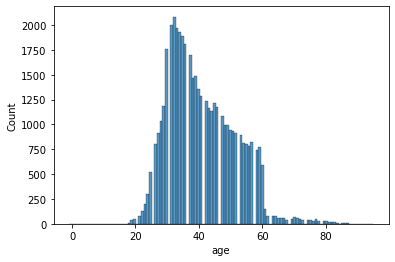

In [6]:
sns.histplot(dataset['age'])

#### Age is right skewed, use median to fill in missing values

In [7]:
agemed=dataset['age'].median()
dataset['age'].fillna(agemed, inplace=True)

In [8]:
dataset.isnull().sum()

age          0
marital      0
education    0
balance      3
housing      0
loan         0
duration     0
y            0
dtype: int64

<AxesSubplot:xlabel='balance', ylabel='Count'>

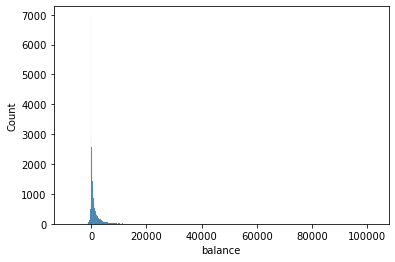

In [9]:
sns.histplot(dataset['balance'])

#### Balance is right skewed, use median to fill in missing values

In [10]:
balmed=dataset['balance'].median()
dataset['balance'].fillna(balmed, inplace=True)

In [11]:
dataset.isnull().sum()

age          0
marital      0
education    0
balance      0
housing      0
loan         0
duration     0
y            0
dtype: int64

## Split the data into independent and dependent variables

In [12]:
dataset.columns

Index(['age', 'marital', 'education', 'balance', 'housing', 'loan', 'duration',
       'y'],
      dtype='object')

#### Trying to predict the column 'y', tells us if the customer agreed to a term deposit

In [13]:
X=dataset.drop('y',axis=1)
Y=dataset[['y']]

## Handling categorical variables

#### Get dummies transforms categorical variables into patterns of zeros and ones

In [14]:
X=pd.get_dummies(dataset[['age', 'marital', 'education', 'balance', 'housing', 'loan', 'duration']], drop_first=True)

In [15]:
X.head()

,age,balance,duration,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes
0,44.0,29.0,151,0,1,1,0,0,1,0
1,33.0,2.0,76,1,0,1,0,0,1,1
2,47.0,1506.0,92,1,0,0,0,1,1,0
3,33.0,1.0,198,0,1,0,0,1,0,0
4,35.0,231.0,139,1,0,0,1,0,1,0


# EXPERIMENT 1

## Splitting the dataset into training, testing and validation set

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.4,random_state=50)

## Training the Logistic Regression model on the training set

In [17]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression()

## Making the confusion matrix

In [18]:
y_pred=classifier.predict(X_test.values)

In [19]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[15646   276]
 [ 1799   363]]


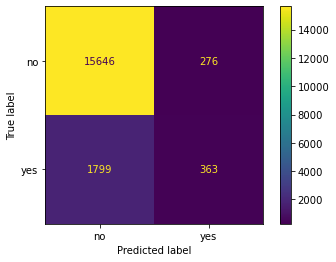

In [20]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

### True Negative - 15,646
### False Negative - 1,799
### True Positive - 363
### False Positive - 276

## Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     15922
         yes       0.57      0.17      0.26      2162

    accuracy                           0.89     18084
   macro avg       0.73      0.58      0.60     18084
weighted avg       0.86      0.89      0.86     18084



### Accuracy is 89% for 60/40 train and test split

# EXPERIMENT 2

## Splitting the dataset into training, testing and validation set

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=50)

## Training the Logistic Regression model on the training set

In [23]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression()

## Making the confusion matrix

In [24]:
y_pred=classifier.predict(X_test.values)

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[7800  137]
 [ 897  208]]


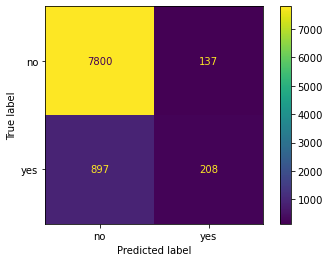

In [26]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

### True Negative - 7,800
### False Negative - 897
### True Positive - 208
### False Positive - 137

## Classification Report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7937
         yes       0.60      0.19      0.29      1105

    accuracy                           0.89      9042
   macro avg       0.75      0.59      0.61      9042
weighted avg       0.86      0.89      0.86      9042



### Accuracy is 89% for 80/20 train and test split

# EXPERIMENT 3

## Splitting the dataset into training, testing and validation set

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.1,random_state=50)

## Training the Logistic Regression model on the training set

In [29]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression()

## Making the confusion matrix

In [30]:
y_pred=classifier.predict(X_test.values)

In [31]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[3905   67]
 [ 457   92]]


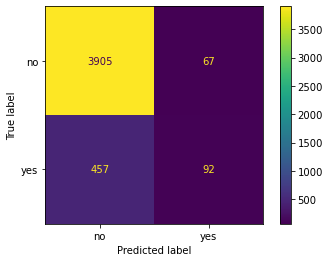

In [32]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

### True Negative - 3,905
### False Negative - 457
### True Positive - 92
### False Positive - 67

## Classification Report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      3972
         yes       0.58      0.17      0.26       549

    accuracy                           0.88      4521
   macro avg       0.74      0.58      0.60      4521
weighted avg       0.86      0.88      0.85      4521



### Accuracy is 88% for 90/10 train and test split